In [1]:
import matplotlib.pyplot as plt

import json
import os

In [2]:
with open(f'./yolact_base_log.json') as file_object:
        training_history = json.load(file_object)

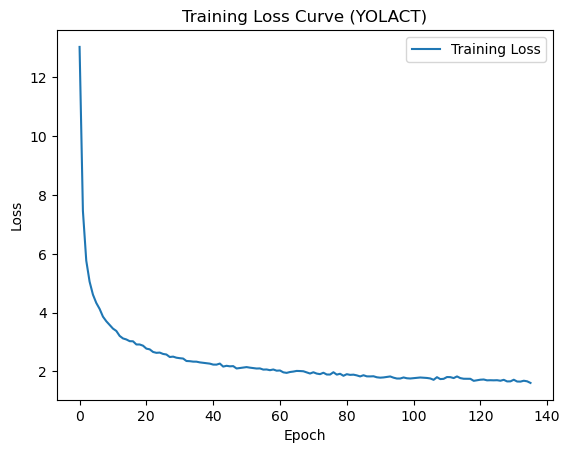

In [3]:
epoch_losses = {}

# Accumulate loss values for each epoch
for entry in training_history:
    if entry['type'] == 'train':
        epoch = entry['data']['epoch']
        total_loss = entry['data']['loss']['T']
        
        if epoch in epoch_losses:
            epoch_losses[epoch]['total_loss'] += total_loss
            epoch_losses[epoch]['count'] += 1
        else:
            epoch_losses[epoch] = {'total_loss': total_loss, 'count': 1}

average_losses = [epoch_losses[epoch]['total_loss'] / epoch_losses[epoch]['count'] for epoch in sorted(epoch_losses.keys())]

plt.plot(average_losses, label='Training Loss')
plt.title('Training Loss Curve (YOLACT)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


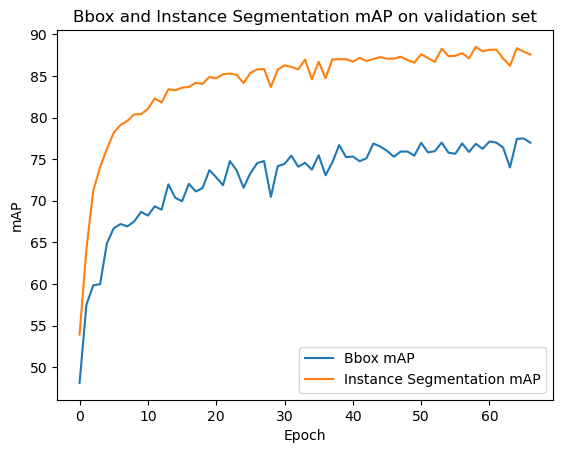

In [4]:
val_epoch_bbox = {}
val_epoch_mask = {}

# Accumulate loss values for each epoch for both training and validation
for entry in training_history:
    if entry['type'] == 'val':
        bbox = entry['data']['box']['all']
        mask = entry['data']['mask']['all']
        val_epoch_bbox[entry['data']['epoch']] = bbox
        val_epoch_mask[entry['data']['epoch']] = mask

        
plt.plot(val_epoch_bbox.values(), label='Bbox mAP')
plt.plot(val_epoch_mask.values(), label='Instance Segmentation mAP')
plt.title('Bbox and Instance Segmentation mAP on validation set')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.show()

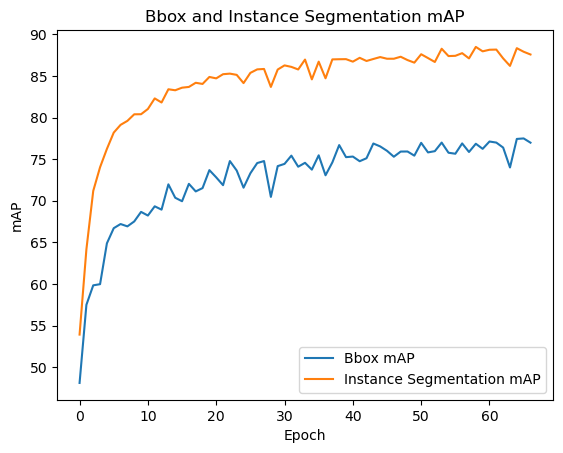

In [5]:
# Create dictionaries to store cumulative loss values and counts for each epoch
val_epoch_bbox = {}
val_epoch_mask = {}

# Accumulate loss values for each epoch for both training and validation
for entry in training_history:
    if entry['type'] == 'val':
        # Assuming 'loss' in the validation entry refers to the total validation loss
        bbox = entry['data']['box']['all']
        mask = entry['data']['mask']['all']
        val_epoch_bbox[entry['data']['epoch']] = bbox
        val_epoch_mask[entry['data']['epoch']] = mask

        
plt.plot(val_epoch_bbox.values(), label='Bbox mAP')
plt.plot(val_epoch_mask.values(), label='Instance Segmentation mAP')
plt.title('Bbox and Instance Segmentation mAP')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.show()